In [7]:
import datetime
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import opendatasets as od
from os.path import exists
from shapely.geometry import Point
 
input_file_path = 'taxi-trajectory/train.csv'
 
def get_porto_taxi_from_kaggle():
    if not exists(input_file_path):
        od.download("https://www.kaggle.com/datasets/crailtap/taxi-trajectory")
 
get_porto_taxi_from_kaggle()
df = pd.read_csv(input_file_path, nrows=200, usecols=['TRIP_ID', 'TAXI_ID', 'TIMESTAMP', 'MISSING_DATA', 'POLYLINE'])
df.POLYLINE = df.POLYLINE.apply(eval)  # string to list
	
def unixtime_to_datetime(unix_time):
    return datetime.datetime.fromtimestamp(unix_time)
 
def compute_datetime(row):
    unix_time = row['TIMESTAMP']
    offset = row['running_number'] * datetime.timedelta(seconds=15)
    return unixtime_to_datetime(unix_time) + offset
 
def create_point(xy):
    try: 
        return Point(xy)
    except TypeError:  # when there are nan values in the input data
        return None
  
new_df = df.explode('POLYLINE')
new_df['geometry'] = new_df['POLYLINE'].apply(create_point)
new_df['running_number'] = new_df.groupby('TRIP_ID').cumcount()
new_df['datetime'] = new_df.apply(compute_datetime, axis=1)
new_df.drop(columns=['POLYLINE', 'TIMESTAMP', 'running_number'], inplace=True)
new_df

,TRIP_ID,TAXI_ID,MISSING_DATA,geometry,datetime
0,1372636858620000589,20000589,False,POINT (-8.618643 41.141412),2013-07-01 02:00:58
0,1372636858620000589,20000589,False,POINT (-8.618499 41.141376),2013-07-01 02:01:13
0,1372636858620000589,20000589,False,POINT (-8.620326 41.14251),2013-07-01 02:01:28
0,1372636858620000589,20000589,False,POINT (-8.622153 41.143815),2013-07-01 02:01:43
0,1372636858620000589,20000589,False,POINT (-8.623953 41.144373),2013-07-01 02:01:58
...,...,...,...,...,...
199,1372647115620000201,20000201,False,POINT (-8.696754 41.193297),2013-07-01 05:00:55
199,1372647115620000201,20000201,False,POINT (-8.698329 41.193225),2013-07-01 05:01:10
199,1372647115620000201,20000201,False,POINT (-8.69931 41.194332),2013-07-01 05:01:25
199,1372647115620000201,20000201,False,POINT (-8.699985 41.195493),2013-07-01 05:01:40


In [8]:
trajs = mpd.TrajectoryCollection(
    gpd.GeoDataFrame(new_df, crs=4326), 
    traj_id_col='TRIP_ID', obj_id_col='TAXI_ID', t='datetime')
trajs.hvplot(title='Kaggle Taxi Trajectory Data', tiles='CartoLight')

:Overlay
   .WMTS.I           :WMTS   [Longitude,Latitude]
   .Path.I           :Path   [Longitude,Latitude]
   .Path.II          :Path   [Longitude,Latitude]
   .Path.III         :Path   [Longitude,Latitude]
   .Path.IV          :Path   [Longitude,Latitude]
   .Path.V           :Path   [Longitude,Latitude]
   .Path.VI          :Path   [Longitude,Latitude]
   .Path.VII         :Path   [Longitude,Latitude]
   .Path.VIII        :Path   [Longitude,Latitude]
   .Path.IX          :Path   [Longitude,Latitude]
   .Path.X           :Path   [Longitude,Latitude]
   .Path.XI          :Path   [Longitude,Latitude]
   .Path.XII         :Path   [Longitude,Latitude]
   .Path.XIII        :Path   [Longitude,Latitude]
   .Path.XIV         :Path   [Longitude,Latitude]
   .Path.XV          :Path   [Longitude,Latitude]
   .Path.XVI         :Path   [Longitude,Latitude]
   .Path.XVII        :Path   [Longitude,Latitude]
   .Path.XVIII       :Path   [Longitude,Latitude]
   .Path.XIX         :Path   [Longitude,Latitude]
   .Path.XX          :Path   [Longitude,Latitude]
   .Path.XXI         :Path   [Longitude,Latitude]
   .Path.XXII        :Path   [Longitude,Latitude]
   .Path.XXIII       :Path   [Longitude,Latitude]
   .Path.XXIV        :Path   [Longitude,Latitude]
   .Path.XXV         :Path   [Longitude,Latitude]
   .Path.XXVI        :Path   [Longitude,Latitude]
   .Path.XXVII       :Path   [Longitude,Latitude]
   .Path.XXVIII      :Path   [Longitude,Latitude]
   .Path.XXIX        :Path   [Longitude,Latitude]
   .Path.XXX         :Path   [Longitude,Latitude]
   .Path.XXXI        :Path   [Longitude,Latitude]
   .Path.XXXII       :Path   [Longitude,Latitude]
   .Path.XXXIII      :Path   [Longitude,Latitude]
   .Path.XXXIV       :Path   [Longitude,Latitude]
   .Path.XXXV        :Path   [Longitude,Latitude]
   .Path.XXXVI       :Path   [Longitude,Latitude]
   .Path.XXXVII      :Path   [Longitude,Latitude]
   .Path.XXXVIII     :Path   [Longitude,Latitude]
   .Path.XXXIX       :Path   [Longitude,Latitude]
   .Path.XL          :Path   [Longitude,Latitude]
   .Path.XLI         :Path   [Longitude,Latitude]
   .Path.XLII        :Path   [Longitude,Latitude]
   .Path.XLIII       :Path   [Longitude,Latitude]
   .Path.XLIV        :Path   [Longitude,Latitude]
   .Path.XLV         :Path   [Longitude,Latitude]
   .Path.XLVI        :Path   [Longitude,Latitude]
   .Path.XLVII       :Path   [Longitude,Latitude]
   .Path.XLVIII      :Path   [Longitude,Latitude]
   .Path.XLIX        :Path   [Longitude,Latitude]
   .Path.L           :Path   [Longitude,Latitude]
   .Path.LI          :Path   [Longitude,Latitude]
   .Path.LII         :Path   [Longitude,Latitude]
   .Path.LIII        :Path   [Longitude,Latitude]
   .Path.LIV         :Path   [Longitude,Latitude]
   .Path.LV          :Path   [Longitude,Latitude]
   .Path.LVI         :Path   [Longitude,Latitude]
   .Path.LVII        :Path   [Longitude,Latitude]
   .Path.LVIII       :Path   [Longitude,Latitude]
   .Path.LIX         :Path   [Longitude,Latitude]
   .Path.LX          :Path   [Longitude,Latitude]
   .Path.LXI         :Path   [Longitude,Latitude]
   .Path.LXII        :Path   [Longitude,Latitude]
   .Path.LXIII       :Path   [Longitude,Latitude]
   .Path.LXIV        :Path   [Longitude,Latitude]
   .Path.LXV         :Path   [Longitude,Latitude]
   .Path.LXVI        :Path   [Longitude,Latitude]
   .Path.LXVII       :Path   [Longitude,Latitude]
   .Path.LXVIII      :Path   [Longitude,Latitude]
   .Path.LXIX        :Path   [Longitude,Latitude]
   .Path.LXX         :Path   [Longitude,Latitude]
   .Path.LXXI        :Path   [Longitude,Latitude]
   .Path.LXXII       :Path   [Longitude,Latitude]
   .Path.LXXIII      :Path   [Longitude,Latitude]
   .Path.LXXIV       :Path   [Longitude,Latitude]
   .Path.LXXV        :Path   [Longitude,Latitude]
   .Path.LXXVI       :Path   [Longitude,Latitude]
   .Path.LXXVII      :Path   [Longitude,Latitude]
   .Path.LXXVIII     :Path   [Longitude,Latitude]
   .Path.LXXIX       :Path   [Longitude,L

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
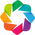

In [9]:
import dash
from dash import dcc, html, Input, Output
import hvplot.pandas  # Needed for hvplot integration
import holoviews as hv
from holoviews import opts

# Required for displaying hvplot/holoviews in Dash
hv.extension('bokeh')
renderer = hv.renderer('bokeh')

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Taxi Trajectory Dashboard"),
    dcc.Graph(id='map-plot', style={'height': '70vh'}),
    # Add more controls or filters as needed here
])

# Callback for updating the map
@app.callback(
    Output('map-plot', 'figure'),
    [
        # Inputs from your controls (e.g., dropdowns, sliders)
    ]
)
def update_map():
    # Generate the trajectory plot (assuming trajs is your TrajectoryCollection)
    plot = trajs.hvplot(title='Kaggle Taxi Trajectory Data', tiles='CartoLight')

    # Convert Holoviews object to Plotly figure
    plotly_fig = renderer.get_plot(plot).state
    return plotly_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
